In [112]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import itertools

# modeling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

# clustering
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


In [56]:
df = pd.read_csv("online_shoppers_intention.csv")

# 1. Data overview

Let's first check the basics of the dataset - the rows, columns, datatypes and null values.

In [57]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [59]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [60]:
# check na values
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

The dataset is pretty clean and ready for the next steps - let's see how each column is distributed.

Administrative


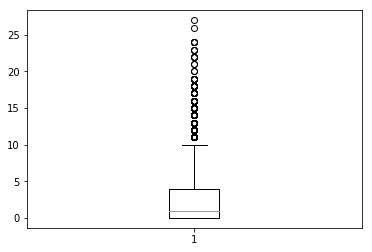

Administrative_Duration


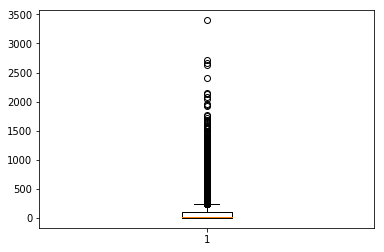

Informational


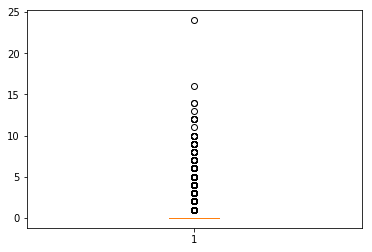

Informational_Duration


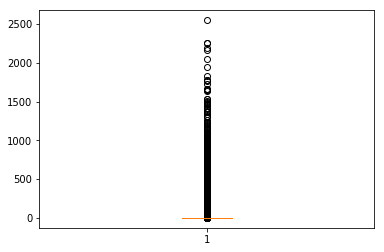

ProductRelated


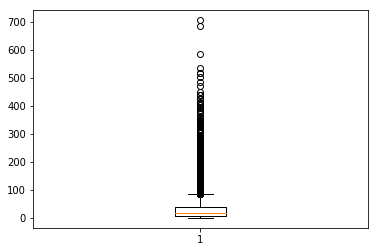

ProductRelated_Duration


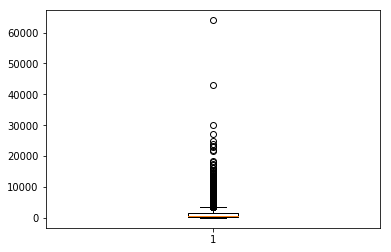

BounceRates


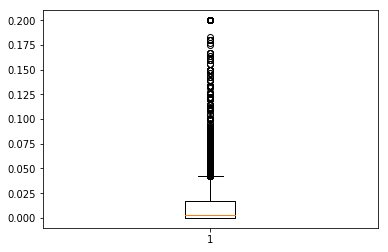

ExitRates


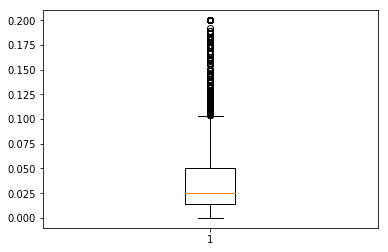

PageValues


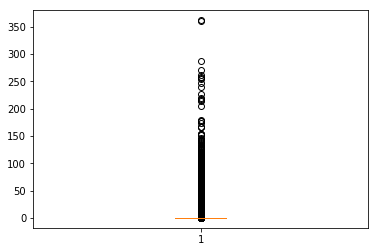

SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64


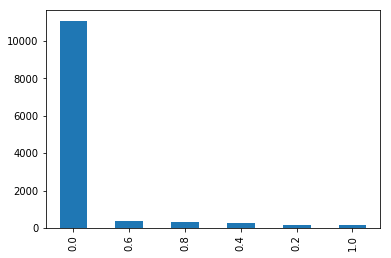

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


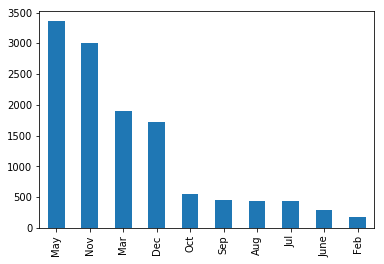

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


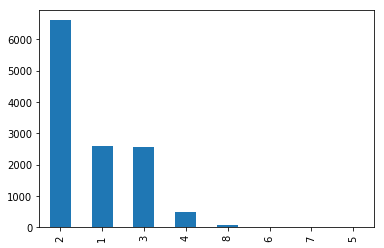

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


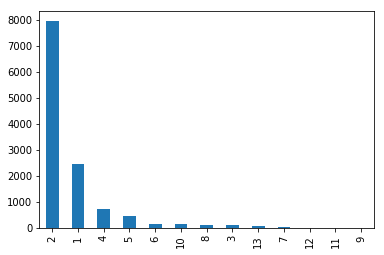

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64


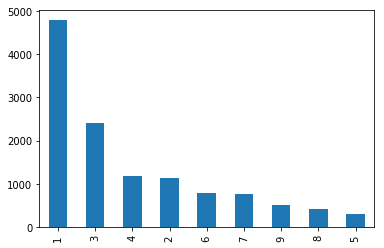

TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64


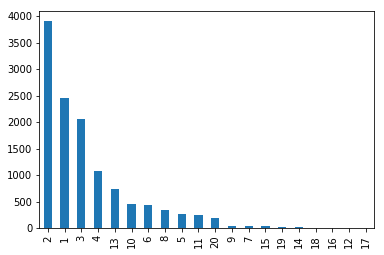

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


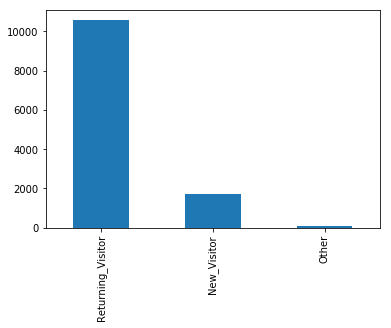

Weekend
False    9462
True     2868
Name: Weekend, dtype: int64


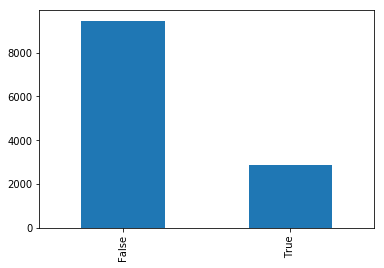

Revenue
False    10422
True      1908
Name: Revenue, dtype: int64


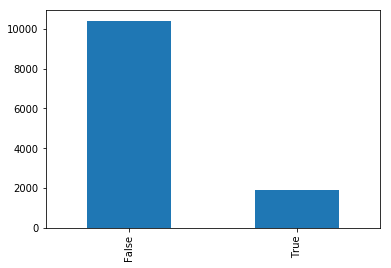

In [61]:
# type casting - bar charts for categorical columns, boxplots for numeric
cat_col = df.columns[9:16]
num_col = df.columns[0:9]
bin_col = df.columns[16:18]
for i in num_col:
    print (i)
    plt.boxplot(df[i])
    plt.show()
for i in cat_col:
    df[i] = df[i].astype("category")
    print (i)
    print (df[i].value_counts())
    df[i].value_counts().plot.bar()
    plt.show()
for i in bin_col:
    print (i)
    print (df[i].value_counts())
    df[i].value_counts().plot.bar()
    plt.show()


intersting findings: 
1. We see outliers existed in most numerical columns, especially those about page durations. It's unlikely that a person will have a session longer than hours, so we need to handle this outliers later.
2. For most categorical variables, there're some main groups, and a small number of data spreaded out in other groups. To avoid a sparse dataset after one hot encoding, we can group the small categories into one.
3. The positive class is about 15%. We may need to avoid using accuracy as an evaluation metrics, over-sample the minority class or do something else to handle the class imblance issue.

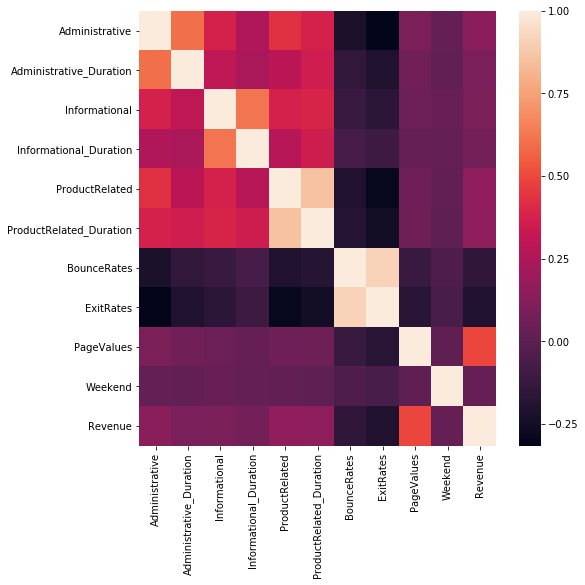

In [62]:
# check correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

In [63]:
df.corr()['Revenue']

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.095200
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492569
Weekend                    0.029295
Revenue                    1.000000
Name: Revenue, dtype: float64

We can see the correlation as a bivariate analysis. The heatmap shows us:

1. the visited page types are correlated with the respective duration. The 3 sets of variables are all correlated among them. 
2. PageValues is the most positively correlated to the lable, Revenue. Bounce rate and Exit rate are the most negatively correlated factors.

It doesn't show us the impact of the categoical features, or how all the features interact with each other.

# 2. Modelling

## 2.1 outliers

In [64]:
new_df = df.copy()
# assign outliers to new values - q3+1.5*iqr
for i in ["Administrative","Administrative_Duration","ProductRelated","ProductRelated_Duration"]:
    cap = df[i].quantile(0.75)+(df[i].quantile(0.75)-df[i].quantile(0.25))
    new_df[i]=new_df[i].apply(lambda x: min(x, cap))
# for information and its duration, the iqr is rather small, so we can set the cap according to the visualization
new_df["Informational"] = new_df["Informational"].apply(lambda x: min(x, 20))
new_df["Informational_Duration"] = new_df["Informational_Duration"].apply(lambda x: min(x, 2000))


## 2.2  add new features

In [65]:
new_df["total_pages"] = new_df["Administrative"]+ new_df["ProductRelated"] + new_df["Informational"]
new_df["total_duration"] = new_df["Administrative_Duration"]+ new_df["ProductRelated_Duration"] + new_df["Informational_Duration"]

In [66]:
new_df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_pages,total_duration
0,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,1.0,0.000000
1,0.0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,2.0,64.000000
2,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,1.0,0.000000
3,0.0,0.0,0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,2.0,2.666667
4,0.0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,10.0,627.500000
5,0.0,0.0,0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False,19.0,154.216667
6,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False,1.0,0.000000
7,1.0,0.0,0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False,1.0,0.000000
8,0.0,0.0,0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False,2.0,37.000000
9,0.0,0.0,0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False,3.0,738.000000


## 2.3 grouping values in the categorical features
This reduces columns from 80 to about 50,and saves up computing resources and avoids possible noises in the corner cases. 

In [67]:
operating_systems_main_groups = list(new_df["OperatingSystems"].value_counts()[:5].index)
browser_main_groups = list(new_df["Browser"].value_counts()[:5].index)
region_main_groups = list(new_df["Region"].value_counts()[:5].index)
traffic_main_groups = list(new_df["TrafficType"].value_counts()[:5].index)

In [68]:
def group(x, lst):
    if x not in lst:
        return "Other"
    return x

In [69]:
new_df["OperatingSystems"] = new_df["OperatingSystems"].apply(lambda x:group(x,operating_systems_main_groups))
new_df["Browser"] = new_df["Browser"].apply(lambda x:group(x,browser_main_groups))
new_df["Region"] = new_df["Region"].apply(lambda x:group(x,region_main_groups))
new_df["TrafficType"] = new_df["TrafficType"].apply(lambda x:group(x,traffic_main_groups))


In [70]:
new_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_pages,total_duration
0,0.0,0.0,0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,1.0,0.000000
1,0.0,0.0,0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,2.0,64.000000
2,0.0,0.0,0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,Other,3,Returning_Visitor,False,False,1.0,0.000000
3,0.0,0.0,0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,2.0,2.666667
4,0.0,0.0,0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,Other,1,4,Returning_Visitor,True,False,10.0,627.500000


## 2.4 One Hot Encoding
Lable encoder vs One hot encoder

In [71]:
# one hot encoding
df_ohe = pd.get_dummies(new_df)

In [72]:
df_ohe.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Weekend', 'Revenue',
       'total_pages', 'total_duration', 'SpecialDay_0.0', 'SpecialDay_0.2',
       'SpecialDay_0.4', 'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_8', 'OperatingSystems_Other',
       'Browser_1', 'Browser_2', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_Other', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_6', 'Region_Other', 'TrafficType_1', 'TrafficType_2',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_13', 'TrafficType_Other',
       'VisitorType_New_Visitor', 'Visi

In [73]:
df_ohe.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Weekend,...,Region_Other,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_Other,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,False,...,0,1,0,0,0,0,0,0,0,1
1,0.0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,False,...,0,0,1,0,0,0,0,0,0,1
2,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,False,...,1,0,0,1,0,0,0,0,0,1
3,0.0,0.0,0,0.0,2.0,2.666667,0.050000,0.140000,0.0,False,...,0,0,0,0,1,0,0,0,0,1
4,0.0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,True,...,0,0,0,0,1,0,0,0,0,1
5,0.0,0.0,0,0.0,19.0,154.216667,0.015789,0.024561,0.0,False,...,0,0,0,1,0,0,0,0,0,1
6,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,False,...,0,0,0,1,0,0,0,0,0,1
7,1.0,0.0,0,0.0,0.0,0.000000,0.200000,0.200000,0.0,True,...,0,0,0,0,0,0,1,0,0,1
8,0.0,0.0,0,0.0,2.0,37.000000,0.000000,0.100000,0.0,False,...,0,0,0,1,0,0,0,0,0,1
9,0.0,0.0,0,0.0,3.0,738.000000,0.000000,0.022222,0.0,False,...,0,0,1,0,0,0,0,0,0,1


## 2.5 Feature Selection
Remove some features that are highly colinear.


In [74]:
for i in df_ohe.columns:
    df_ohe[i] = df_ohe[i].astype("float64")
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 56 columns):
Administrative                   12330 non-null float64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null float64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null float64
ProductRelated_Duration          12330 non-null float64
BounceRates                      12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
Weekend                          12330 non-null float64
Revenue                          12330 non-null float64
total_pages                      12330 non-null float64
total_duration                   12330 non-null float64
SpecialDay_0.0                   12330 non-null float64
SpecialDay_0.2                   12330 non-null float64
SpecialDay_0.4                   12330 non-null flo

In [75]:
X = df_ohe.drop(columns = ['Revenue'])
columns = X.columns.tolist()
threshold = 5
dropped = True
remain_cols = columns.copy()
while dropped:
    dropped = False
    vif = [variance_inflation_factor(X[remain_cols].values, ix) for ix in range(len(remain_cols))]
    print (vif)
    max_vif = vif.index(max(vif))
    if (max(vif) > threshold):
        print('dropping \'' + remain_cols[max_vif] + '\' at index: ' + str(max_vif))
        remain_cols.pop(max_vif)
        #remain_cols = remain_cols.drop(X.columns[max_vif])
        dropped=True
print('Remaining variables:')
print(remain_cols)


/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[inf, inf, inf, inf, inf, inf, 6.790959978084288, 8.170228063862837, 1.0685273969284608, 1.106061510416892, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
dropping 'Administrative' at index: 0
[inf, 2.874781303178283, inf, 269.41717665601504, inf, 6.790959978084293, 8.170228063862837, 1.0685273969284608, 1.106061510416892, 296.8062471505569, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
dropping 'Administrative_Duration' at index: 0
[2.874781303178283, 16.29586992686931, 269.41717665601504, 635.0723248543258, 6.790959978084293, 8.170228063862837, 1.0685273969284608, 1.1060615104168916, 296.8062471505569, 724.1466658891114, inf, inf, inf, in

[2.060578508568793, 1.7427788121404684, 9.113957084394677, 7.738787800090322, 7.7596139880243795, 12.737034598158042, 1.172358707056189, 1.4292921197338757, 1.08830948030202, 1.1212427833231844, 1.1756676789854064, 1.1683957252173767, 1.1160128917820553, 2.627130424159023, 1.2231542421166162, 1.3909634264547068, 1.293911518033217, 2.5451505707624644, 4.834005826137348, 4.019004505078379, 1.4773172115991768, 1.400693609452885, 3.7907892485615404, 1.9834391439019607, 1.186904603148149, 1.8401590228251599, 1.01713687772089, 1.15267185212338, 1.0857747807761706, 1.0329205718046575, 1.1513847383056524, 1.2348648803863307, 1.477135561401662, 1.235803925470868, 1.1658549327101728, 1.4383738129774808, 2.7562503744597433, 1.8096649013541302, 1.5419860791388122, 1.3905584434436888, 1.929799925112528, 1.3930759809396847, 1.816970529000195]
dropping 'ExitRates' at index: 5
[2.0605433287427855, 1.7427530294563387, 8.743447409951303, 7.738088532748311, 1.435454818183535, 1.1591293606120776, 1.428952

## 2.6 splitting train test set and scaling

In [170]:
# prepare train, test and scale the data
y = df_ohe['Revenue']
X = df_ohe[remain_cols]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [171]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2.7 model fitting and visualization

In [78]:
# visualizations code from https://www.kaggle.com/kageyama/lgbm-online-shopper-s-eda-and-classification

def plot_confusion_matrix(truth, pred, classes, normalize=False, title=''):
    cm = confusion_matrix(truth, pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix', size=15)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.tight_layout()

precision:  0.23519458544839256
recall:  0.9065217391304348
              precision    recall  f1-score   support

         0.0       0.97      0.48      0.64      2623
         1.0       0.24      0.91      0.37       460

   micro avg       0.55      0.55      0.55      3083
   macro avg       0.60      0.69      0.51      3083
weighted avg       0.86      0.55      0.60      3083



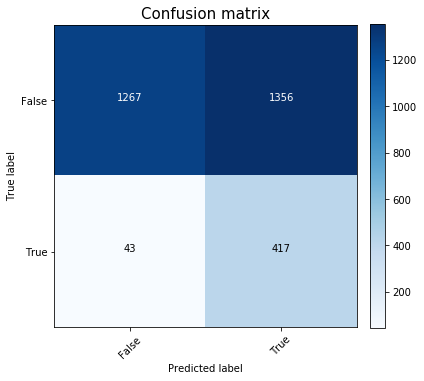

In [79]:
# Gaussian NB is a generative model, so we don't oversample here.
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
plot_confusion_matrix(y_test,y_pred, ['False','True'])

Very high recall rate - but also high false positive rate.

In [172]:
# oversample the minority class - for logreg and rfc, oversampling of the training data give them more positive incidence to learn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_scaled,y_train = sm.fit_sample(X_train_scaled,y_train.ravel())
pd.Series(y_train).value_counts()

1.0    7840
0.0    7840
dtype: int64

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


precision:  0.5396113602391629
recall:  0.7847826086956522
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      2623
         1.0       0.54      0.78      0.64       460

   micro avg       0.87      0.87      0.87      3083
   macro avg       0.75      0.83      0.78      3083
weighted avg       0.90      0.87      0.88      3083



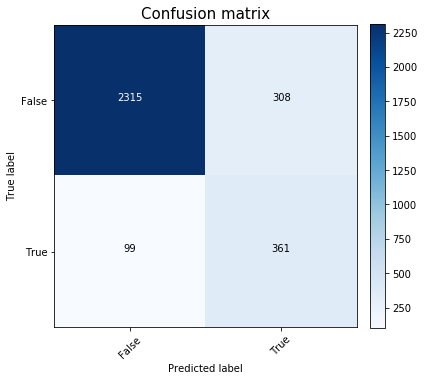

In [81]:
logreg = LogisticRegressionCV(scoring = 'f1', max_iter = 1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
plot_confusion_matrix(y_test,y_pred, ['False','True'])

precision:  0.6462715105162524
recall:  0.6746506986027944
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      2582
         1.0       0.65      0.67      0.66       501

   micro avg       0.89      0.89      0.89      3083
   macro avg       0.79      0.80      0.80      3083
weighted avg       0.89      0.89      0.89      3083



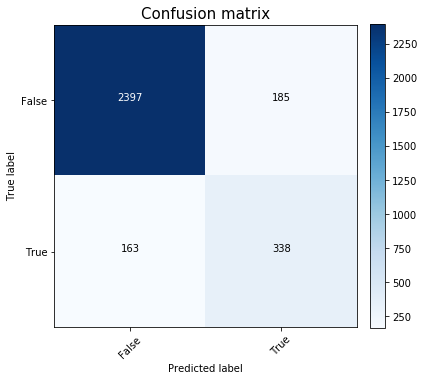

In [176]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train_scaled, y_train)
y_pred = rfc.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
plot_confusion_matrix(y_test,y_pred, ['False','True'])

Using the best performing rfc model, let's see how it predicts the conversion rate on the test population:

In [174]:
print ("the predicted conversion rate is", y_pred.mean())
print ("the actual conversion rate is", y_test.mean())

the predicted conversion rate is 0.17872202400259488
the actual conversion rate is 0.16250405449237756


Next, we can take a closer look at the factors and how the models weighs them:

In [179]:
coef = logreg.coef_[0]
# plt.figure(figsize=(20,20))
# plt.barh(y=X.columns,width = coef)
# plt.show()


top_10 = np.argsort(-np.absolute(coef))[:20]
for i in top_10:
    print ("%-25s %s" % ((X.columns[i], coef[i])))

PageValues                2.6526259101639904
BounceRates               -0.6766406313770039
Month_May                 -0.4858107358241173
ProductRelated_Duration   0.39917210099770656
Month_Mar                 -0.33609214874888244
Month_Feb                 -0.30059453265811964
Month_Dec                 -0.2992243529250234
VisitorType_Other         -0.1853919808722978
Month_Nov                 0.1610791781185892
TrafficType_2             0.1584473105564504
OperatingSystems_4        -0.15080159391400205
TrafficType_Other         0.1317619949985046
TrafficType_13            -0.12372308926146018
Browser_6                 -0.11452553349517183
SpecialDay_0.8            -0.11163652225373305
SpecialDay_0.6            0.10962331668232903
VisitorType_New_Visitor   0.10377844191094729
OperatingSystems_8        0.1017460195539137
Region_Other              -0.08856594439854082
Month_June                -0.08345535637463337


precision:  0.6462715105162524
recall:  0.6746506986027944


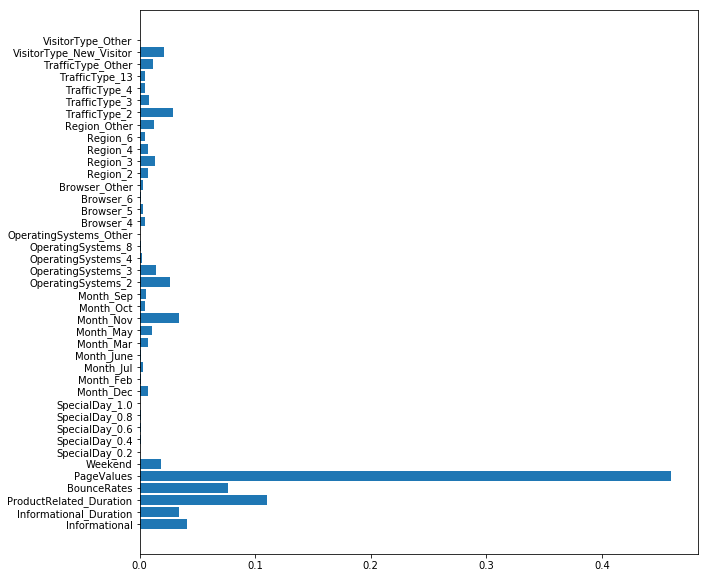

PageValues                0.4599249456521735
ProductRelated_Duration   0.10987625754342017
BounceRates               0.07625834956760082
Informational             0.041430114876184525
Month_Nov                 0.03373240405451847
Informational_Duration    0.033703102753761115
TrafficType_2             0.028745833413728245
OperatingSystems_2        0.026405827854314032
VisitorType_New_Visitor   0.02100029041242556
Weekend                   0.018216714517085807


In [178]:
#rfc.fit(X_train_scaled, y_train)
y_pred = rfc.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
coef = rfc.feature_importances_
plt.figure(figsize=(10,10))
plt.barh(y=X.columns,width = coef)
plt.show()


top_10 = np.argsort(-np.absolute(coef))[:10]
for i in top_10:
    print ("%-25s %s" % ((X.columns[i], coef[i])))

# 3. Clustering with PCA, TSNE, KMeans and GMM

In [142]:
# let's see if we can use the top features to cluster the customers.

In [143]:
# we don't need to split test and training data for clustering, so we can normalized the entire dataset here.
X_scaled = scaler.transform(X)

In [144]:
cluster_df = X_scaled[:,top_10]

In [145]:
cluster_df

array([[-0.32423452, -1.03245516,  3.66920649, ..., -0.67900832,
        -0.54973717, -0.40481681],
       [-0.32423452, -0.96204544, -0.45661085, ...,  1.472736  ,
        -0.54973717, -0.40481681],
       [-0.32423452, -1.03245516,  3.66920649, ..., -0.67900832,
        -0.54973717, -0.40481681],
       ...,
       [-0.32423452, -0.82975219,  1.2624797 , ..., -0.67900832,
         1.81905109, -0.40481681],
       [-0.32423452, -0.65180264, -0.45661085, ..., -0.67900832,
        -0.54973717, -0.40481681],
       [-0.32423452, -1.00907693, -0.45661085, ...,  1.472736  ,
         1.81905109,  2.47025313]])

### 3.1 Dimension reduction with TSNE

In [147]:
tsne_2d = TSNE(n_components = 2).fit_transform(cluster_df)

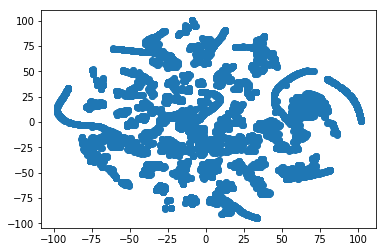

In [148]:
plt.scatter(tsne_2d[:,0],tsne_2d[:,1]) 

### 3.2 Dimension reduction with PCA

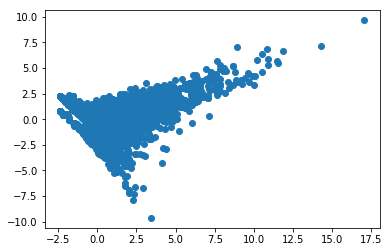

In [150]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(cluster_df)
plt.scatter(pca_2d[:,0],pca_2d[:,1]) 

### 3.3 Choose the best cluster counts

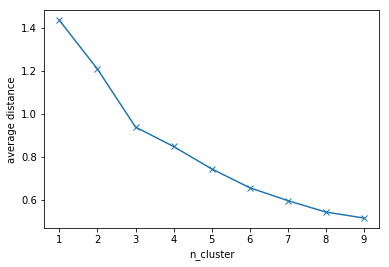

In [151]:
# pca best cluster number
average_distance = []
for k in range(1,10):
    # initialize the model
    kmeans = KMeans(n_clusters = k)
    # fit and assign data to cluster
    kmeans.fit(pca_2d)
    pred = kmeans.predict(pca_2d)
    # take the average distance to centroids
    average_distance.append(sum(np.min(cdist(pca_2d, kmeans.cluster_centers_,'euclidean'),axis = 1))/pred.shape[0])

#visualize the objective value against different k value
plt.plot(range(1,10),average_distance,marker = 'x')
plt.xlabel('n_cluster')
plt.ylabel('average distance')
plt.show()

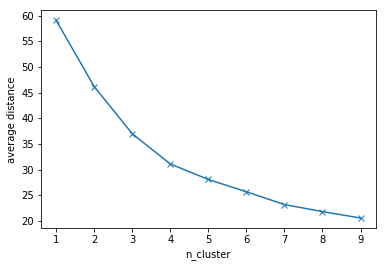

In [152]:
# tsne best cluster numer
average_distance = []
for k in range(1,10):
    # initialize the model
    kmeans = KMeans(n_clusters = k)
    # fit and assign data to cluster
    kmeans.fit(tsne_2d)
    pred = kmeans.predict(tsne_2d)
    # take the average distance to centroids
    average_distance.append(sum(np.min(cdist(tsne_2d, kmeans.cluster_centers_,'euclidean'),axis = 1))/pred.shape[0])

#visualize the objective value against different k value
plt.plot(range(1,10),average_distance,marker = 'x')
plt.xlabel('n_cluster')
plt.ylabel('average distance')
plt.show()

### 3.4 kmeans on pca, 3 clusters

In [153]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(pca_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

(-3.36526842990587, 18.026755623432997, -10.613709119128885, 10.63647404055198)

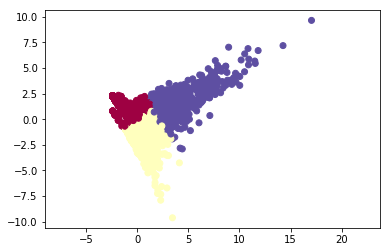

In [154]:
plt.scatter(pca_2d[:,0],pca_2d[:,1],
            c=kmeans.labels_, cmap='Spectral')
plt.axis('equal')

([<matplotlib.axis.XTick at 0x1a2dbb16a0>,
 <a list of 10 Text xticklabel objects>)

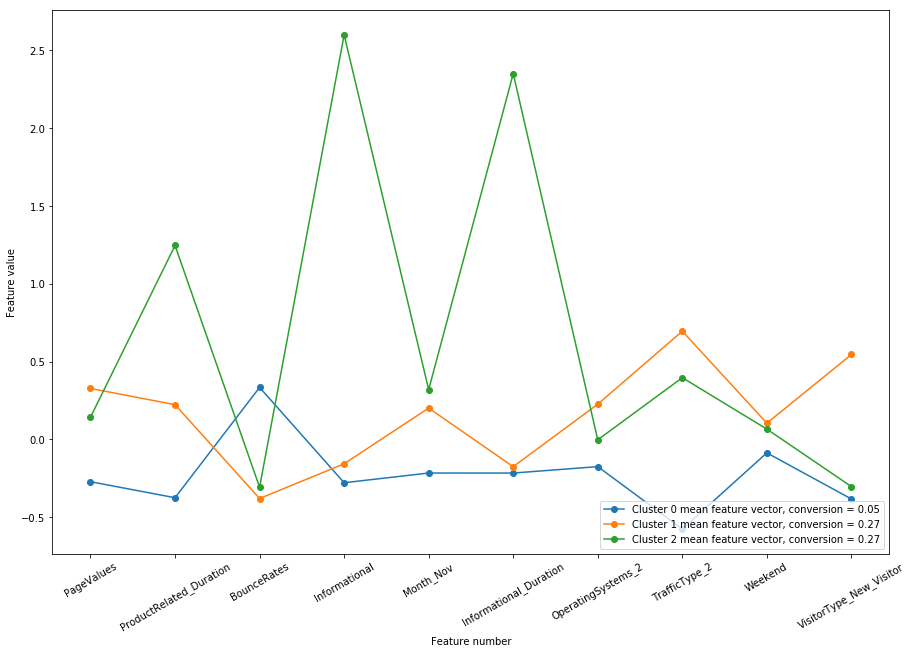

In [155]:
plt.figure(figsize=(15, 10))
for cluster in range(3):
    conversion_rate = round(y[kmeans.labels_ == cluster].mean(),2)
    plt.plot(cluster_df[kmeans.labels_ == cluster].mean(axis=0), 'o-',
             label=('Cluster ' + str(cluster) +' mean feature vector, conversion = '+ str(conversion_rate)))
plt.legend(loc='lower right')
plt.xlabel('Feature number')
plt.ylabel('Feature value')
plt.xticks(np.arange(10),X.columns[top_10],rotation = 30)


### 3.5 kmeans on tsne_2d, 3 clusters


(-107.93764898922281,
 111.92187140133218,
 -104.25187589548544,
 110.02127744577841)

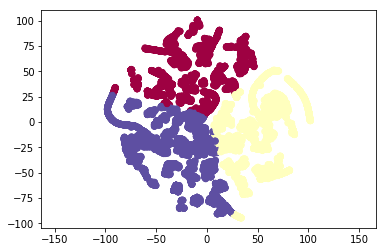

In [165]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(tsne_2d)
plt.scatter(tsne_2d[:,0],tsne_2d[:,1],
            c=kmeans.labels_, cmap='Spectral')
plt.axis('equal')

([<matplotlib.axis.XTick at 0x1a2f121630>,
 <a list of 10 Text xticklabel objects>)

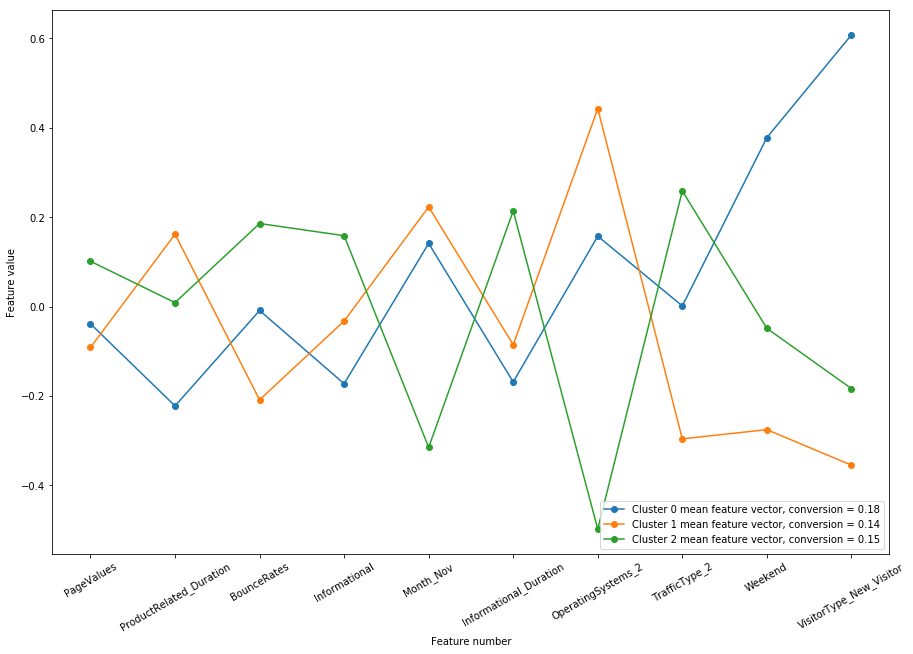

In [166]:
plt.figure(figsize=(15, 10))
for cluster in range(3):
    conversion_rate = round(y[kmeans.labels_ == cluster].mean(),2)
    plt.plot(cluster_df[kmeans.labels_ == cluster].mean(axis=0), 'o-',
             label=('Cluster ' + str(cluster) +' mean feature vector, conversion = '+ str(conversion_rate)))
plt.legend(loc='lower right')
plt.xlabel('Feature number')
plt.ylabel('Feature value')
plt.xticks(np.arange(10),X.columns[top_10],rotation = 30)


### 3.6 GMM on pca_2d - the best results

(-3.36526842990587, 18.026755623432997, -10.613709119128885, 10.63647404055198)

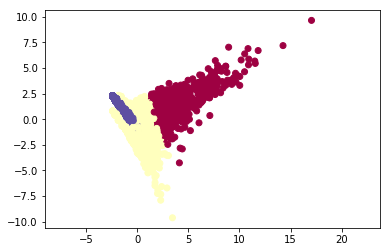

In [158]:
# GMM
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, n_init=1000, random_state=0)
gmm.fit(pca_2d)


gmm_group = gmm.predict(pca_2d)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=gmm_group, cmap='Spectral')
plt.axis('equal')

([<matplotlib.axis.XTick at 0x1a2f0c8cc0>,
 <a list of 10 Text xticklabel objects>)

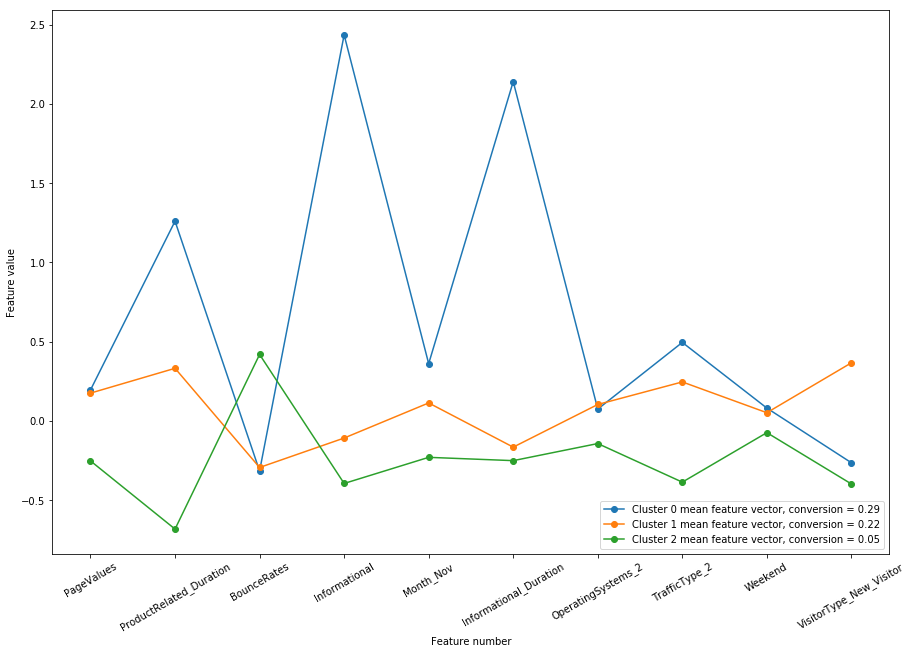

In [159]:
plt.figure(figsize=(15, 10))
for cluster in range(gmm_group.max() + 1):
    conversion_rate = round(y[gmm_group ==cluster].mean(),2)
    plt.plot(cluster_df[gmm_group == cluster].mean(axis=0), 'o-',
             label=('Cluster ' + str(cluster) +' mean feature vector, conversion = '+ str(conversion_rate)))
plt.legend(loc='lower right')
plt.xlabel('Feature number')
plt.ylabel('Feature value')
plt.xticks(np.arange(10),X.columns[top_10],rotation = 30)


### 3.7 GMM on tsne_2d

(-107.93764898922281,
 111.92187140133218,
 -104.25187589548544,
 110.02127744577841)

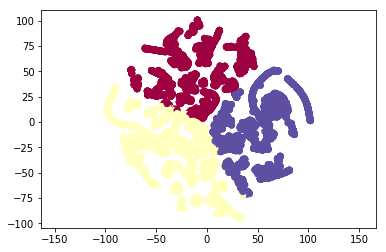

In [162]:
# GMM
gmm = GaussianMixture(n_components=3, n_init=1000, random_state=0)
gmm.fit(tsne_2d)


gmm_group = gmm.predict(tsne_2d)
plt.scatter(tsne_2d[:, 0], tsne_2d[:, 1],
            c=gmm_group, cmap='Spectral')
plt.axis('equal')

([<matplotlib.axis.XTick at 0x1a307b9400>,
 <a list of 10 Text xticklabel objects>)

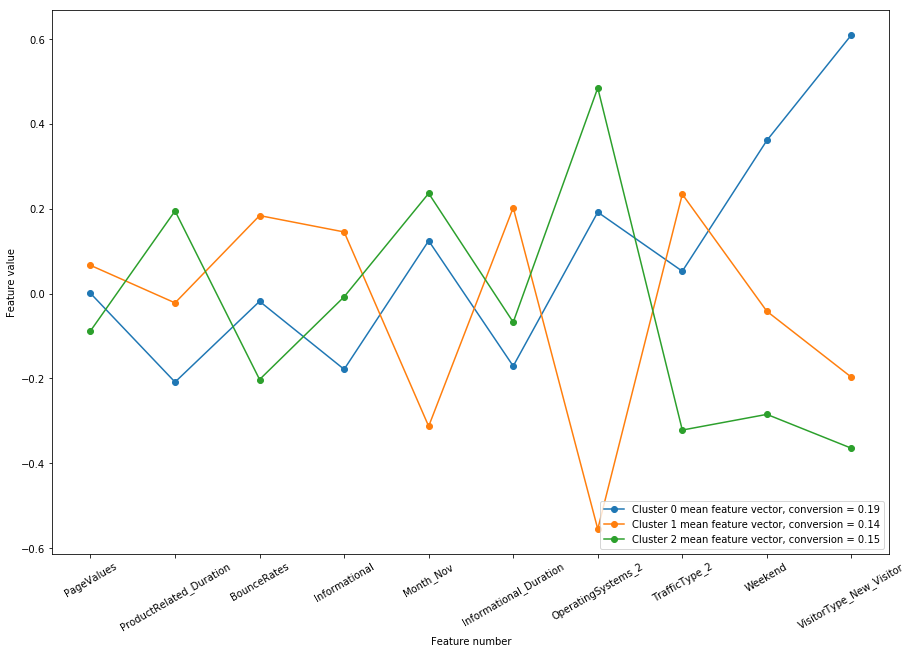

In [163]:
plt.figure(figsize=(15, 10))
for cluster in range(gmm_group.max() + 1):
    conversion_rate = round(y[gmm_group ==cluster].mean(),2)
    plt.plot(cluster_df[gmm_group == cluster].mean(axis=0), 'o-',
             label=('Cluster ' + str(cluster) +' mean feature vector, conversion = '+ str(conversion_rate)))
plt.legend(loc='lower right')
plt.xlabel('Feature number')
plt.ylabel('Feature value')
plt.xticks(np.arange(10),X.columns[top_10],rotation = 30)
